# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends
The max temp increases the closer you get to latitude = 0 or the equator.

The further north or south you go, the higher the wind speed. Meaning the lower wind speeds are closer to the equator.

Cloudiness and humidity appear to be unaffected by the latitude, with humidity always being relatively high and cloudiness being uniformly spead out.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
 
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Empty lists for when the dataframe is created later on
found_city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# City and set count (set of 50)
city_count = 0
set_count = 1

# API City Data Loop
print('Beginning Data Retrieval\n -----------------------------')
for city in cities:
    time.sleep(1)
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    
    # City and set count (of 50)
    if city_count <=49:
        city_count += 1  
    else:
        set_count += 1
        city_count = 1
    
    # Appending to the empty lists above for dataframe  
    try:
        found_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])  
        print(f"Processing Record {city_count} of Set {set_count} | {city}")
    except:
        print(f"City not found. Skipping...")    


Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | mackay
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | korla
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | yatou
City not found. Skipping...
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | te anau
Processing Record 19 of Set 1 | nisia floresta
Processing Record 20 of Set 1 | dwarka
Processing Record 21 of Set 1 | urucara
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | punta arenas
Processing Record 24 of S

Processing Record 5 of Set 5 | scarborough
Processing Record 6 of Set 5 | kokopo
Processing Record 7 of Set 5 | jiaonan
City not found. Skipping...
Processing Record 9 of Set 5 | olafsvik
Processing Record 10 of Set 5 | luanda
Processing Record 11 of Set 5 | cabatuan
Processing Record 12 of Set 5 | tasiilaq
Processing Record 13 of Set 5 | puteyets
Processing Record 14 of Set 5 | bo rai
City not found. Skipping...
Processing Record 16 of Set 5 | chuy
Processing Record 17 of Set 5 | prince rupert
Processing Record 18 of Set 5 | grand gaube
Processing Record 19 of Set 5 | muros
Processing Record 20 of Set 5 | airai
Processing Record 21 of Set 5 | rio grande
Processing Record 22 of Set 5 | marrakesh
City not found. Skipping...
Processing Record 24 of Set 5 | nha trang
City not found. Skipping...
Processing Record 26 of Set 5 | vardo
Processing Record 27 of Set 5 | lavrentiya
Processing Record 28 of Set 5 | humaita
Processing Record 29 of Set 5 | tucuma
Processing Record 30 of Set 5 | nome


Processing Record 10 of Set 9 | heihe
Processing Record 11 of Set 9 | sao miguel do araguaia
Processing Record 12 of Set 9 | guane
Processing Record 13 of Set 9 | hofn
Processing Record 14 of Set 9 | turukhansk
Processing Record 15 of Set 9 | hailey
Processing Record 16 of Set 9 | oussouye
Processing Record 17 of Set 9 | karatau
Processing Record 18 of Set 9 | verkh-usugli
Processing Record 19 of Set 9 | goderich
Processing Record 20 of Set 9 | isangel
Processing Record 21 of Set 9 | vanimo
Processing Record 22 of Set 9 | pasighat
Processing Record 23 of Set 9 | saskylakh
Processing Record 24 of Set 9 | sembe
Processing Record 25 of Set 9 | klaksvik
Processing Record 26 of Set 9 | solnechnyy
Processing Record 27 of Set 9 | newport
City not found. Skipping...
Processing Record 29 of Set 9 | yulara
Processing Record 30 of Set 9 | mayor pablo lagerenza
Processing Record 31 of Set 9 | pueblo
Processing Record 32 of Set 9 | luena
Processing Record 33 of Set 9 | leshukonskoye
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Building the dateframe
city_data_df = pd.DataFrame({'City': found_city,
                             'Lat': lat,
                             'Lng': lng,
                             'Max Temp': max_temp,
                             'Humidity': humidity,
                             'Cloudiness': cloudiness,
                             'Wind Speed': wind_speed,
                             'Country': country,
                             'Date': date}) 

# Setting the index to the city name for the output file  
output_city_data = city_data_df.set_index("City")
output_city_data.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mackay,-21.15,149.20,86.00,58,25,14.99,AU,1603856694
1,Hobart,-42.88,147.33,62.01,82,75,16.11,AU,1603856514
2,Rikitea,-23.12,-134.97,75.42,84,100,15.50,PF,1603856700
3,Vaini,-21.20,-175.20,78.80,74,20,9.17,TO,1603857147
4,Nikolskoye,59.70,30.79,52.00,87,90,11.18,RU,1603857148


In [10]:
# Dataframe statistics
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,18.908637,15.740092,59.634144,73.734807,50.552486,7.089908,1.603857e+09
std,32.236130,91.873073,21.651964,20.628493,40.147014,5.142095,2.657267e+02
min,-54.800000,-179.170000,-5.570000,7.000000,0.000000,0.380000,1.603856e+09
25%,-6.690000,-65.540000,44.600000,64.000000,1.000000,3.010000,1.603857e+09
50%,20.950000,17.130000,63.000000,79.000000,57.000000,5.820000,1.603857e+09
75%,45.385000,98.770000,76.990000,89.000000,90.000000,10.235000,1.603858e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,28.860000,1.603858e+09


In [11]:
# Length of the dataframe
len(city_data_df)

543

In [12]:
# Dataframe of the cities with a humidity of less than 100%
city_data_humid_df = city_data_df[city_data_df['Humidity'] <= 100] 
# city_data_humid_df.drop(city_data_df[city_data_df['Humidity'] > 10].index, inplace=True)
len(city_data_humid_df)

543

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
city_data_humid_df = city_data_df[city_data_df['Humidity'] <= 100] 
# city_data_humid_df.drop(city_data_df[city_data_df['Humidity'] > 10].index, inplace=True)
city_data_humid_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,18.908637,15.740092,59.634144,73.734807,50.552486,7.089908,1.603857e+09
std,32.236130,91.873073,21.651964,20.628493,40.147014,5.142095,2.657267e+02
min,-54.800000,-179.170000,-5.570000,7.000000,0.000000,0.380000,1.603856e+09
25%,-6.690000,-65.540000,44.600000,64.000000,1.000000,3.010000,1.603857e+09
50%,20.950000,17.130000,63.000000,79.000000,57.000000,5.820000,1.603857e+09
75%,45.385000,98.770000,76.990000,89.000000,90.000000,10.235000,1.603858e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,28.860000,1.603858e+09


In [36]:
#  Get the indices of cities that have humidity over 100%.
list(city_data_df[city_data_df['Humidity'] > 100] .index)

[]

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_humid_df.drop(city_data_df[city_data_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mackay,-21.15,149.20,86.00,58,25,14.99,AU,1603856694
1,Hobart,-42.88,147.33,62.01,82,75,16.11,AU,1603856514
2,Rikitea,-23.12,-134.97,75.42,84,100,15.50,PF,1603856700
3,Vaini,-21.20,-175.20,78.80,74,20,9.17,TO,1603857147
4,Nikolskoye,59.70,30.79,52.00,87,90,11.18,RU,1603857148


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

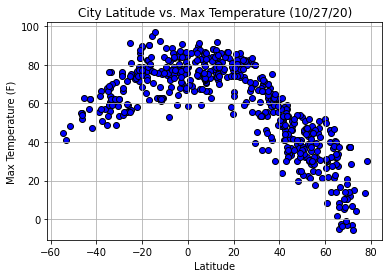

In [70]:
# Latitude vs Max Temperature Scatterplot
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Max Temperature (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.grid()
plt.savefig("../output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

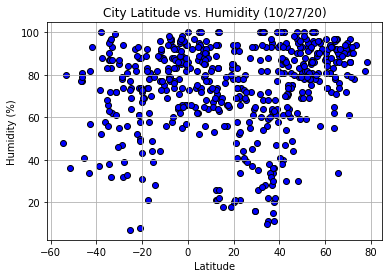

In [71]:
# Latitude vs Humidity Scatterplot
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Humidity (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.grid()
plt.savefig("../output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

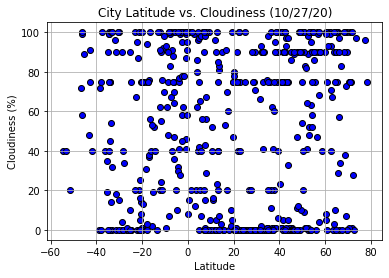

In [72]:
# Latitude vs Cloudiness Scatterplot
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Cloudiness (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.grid()
plt.savefig("../output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

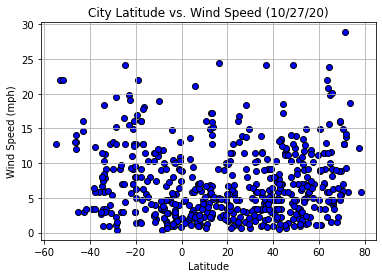

In [73]:
# Latitude vs Wind Speed Scatterplot
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], facecolor='blue', edgecolor="black");
plt.title('City Latitude vs. Wind Speed (10/27/20)');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.grid()
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [74]:
northern_hem_city_data = city_data_humid_df.drop(city_data_df[city_data_df['Lat'] > 0].index, inplace=False)
southern_hem_city_data = city_data_humid_df.drop(city_data_df[city_data_df['Lat'] < 0].index, inplace=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6395962769246414


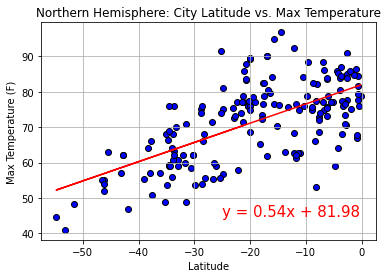

In [75]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_valuesNH = northern_hem_city_data['Lat']
y_valuesNH = northern_hem_city_data['Max Temp']
(slopeNH, interceptNH, rvalueNH, pvalueNH, stderrNH) = linregress(x_valuesNH, y_valuesNH)
regress_valuesNH = x_valuesNH * slopeNH + interceptNH

print(f'The r-value is: {rvalueNH}')

line_eqNH = "y = " + str(round(slopeNH,2)) + "x + " + str(round(interceptNH,2))

plt.scatter(x_valuesNH, y_valuesNH, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH, regress_valuesNH, "red");
plt.annotate(line_eqNH ,(-25,45),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8771062571257536


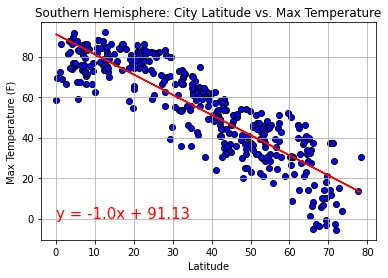

In [76]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_valuesSH = southern_hem_city_data['Lat']
y_valuesSH = southern_hem_city_data['Max Temp']
(slopeSH, interceptSH, rvalueSH, pvalueSH, stderrSH) = linregress(x_valuesSH, y_valuesSH)
regress_valuesSH = x_valuesSH * slopeSH + interceptSH

print(f'The r-value is: {rvalueSH}')

line_eqSH = "y = " + str(round(slopeSH,2)) + "x + " + str(round(interceptSH,2))

plt.scatter(x_valuesSH, y_valuesSH, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH, regress_valuesSH, "red");
plt.annotate(line_eqSH ,(0,0),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2465814197721992


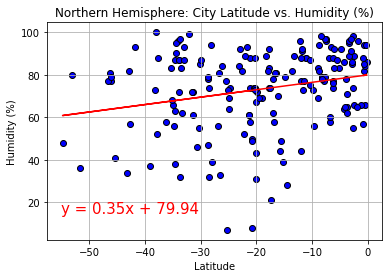

In [77]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_valuesNH2 = northern_hem_city_data['Lat']
y_valuesNH2 = northern_hem_city_data['Humidity']
(slopeNH2, interceptNH2, rvalueNH2, pvalueNH2, stderrNH2) = linregress(x_valuesNH2, y_valuesNH2)
regress_valuesNH2 = x_valuesNH2 * slopeNH2 + interceptNH2

print(f'The r-value is: {rvalueNH2}')

line_eqNH2 = "y = " + str(round(slopeNH2,2)) + "x + " + str(round(interceptNH2,2))

plt.scatter(x_valuesNH2, y_valuesNH2, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH2, regress_valuesNH2, "red");
plt.annotate(line_eqNH2 ,(-55,15),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Humidity (%)');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2259452478544879


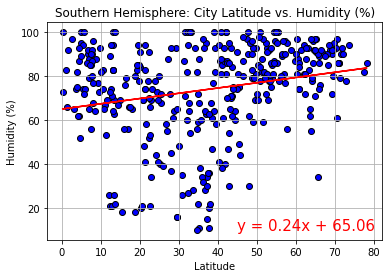

In [78]:
# Southern Hemisphere - Humidity (%)  vs. Latitude Linear Regression
x_valuesSH2 = southern_hem_city_data['Lat']
y_valuesSH2 = southern_hem_city_data['Humidity']
(slopeSH2, interceptSH2, rvalueSH2, pvalueSH2, stderrSH2) = linregress(x_valuesSH2, y_valuesSH2)
regress_valuesSH2 = x_valuesSH2 * slopeSH2 + interceptSH2

print(f'The r-value is: {rvalueSH2}')

line_eqSH2 = "y = " + str(round(slopeSH2,2)) + "x + " + str(round(interceptSH2,2))

plt.scatter(x_valuesSH2, y_valuesSH2, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH2, regress_valuesSH2, "red");
plt.annotate(line_eqSH2 ,(45,10),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Humidity (%)');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21353321480113752


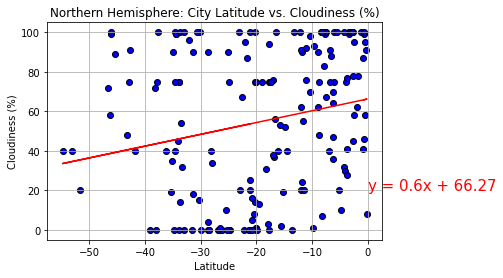

In [79]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_valuesNH3 = northern_hem_city_data['Lat']
y_valuesNH3 = northern_hem_city_data['Cloudiness']
(slopeNH3, interceptNH3, rvalueNH3, pvalueNH3, stderrNH3) = linregress(x_valuesNH3, y_valuesNH3)
regress_valuesNH3 = x_valuesNH3 * slopeNH3 + interceptNH3

print(f'The r-value is: {rvalueNH3}')

line_eqNH3 = "y = " + str(round(slopeNH3,2)) + "x + " + str(round(interceptNH3,2))

plt.scatter(x_valuesNH3, y_valuesNH3, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH3, regress_valuesNH3, "red");
plt.annotate(line_eqNH3 ,(0,20),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (%)');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19567030889193213


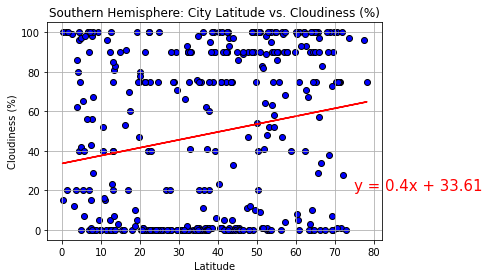

In [80]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_valuesSH3 = southern_hem_city_data['Lat']
y_valuesSH3 = southern_hem_city_data['Cloudiness']
(slopeSH3, interceptSH3, rvalueSH3, pvalueSH3, stderrSH3) = linregress(x_valuesSH3, y_valuesSH3)
regress_valuesSH3 = x_valuesSH3 * slopeSH3 + interceptSH3

print(f'The r-value is: {rvalueSH3}')

line_eqSH3 = "y = " + str(round(slopeSH3,2)) + "x + " + str(round(interceptSH3,2))

plt.scatter(x_valuesSH3, y_valuesSH3, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH3, regress_valuesSH3, "red");
plt.annotate(line_eqSH3 ,(75,20),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (%)');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2732882476401572


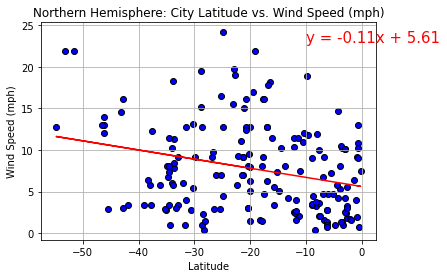

In [81]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_valuesNH4 = northern_hem_city_data['Lat']
y_valuesNH4 = northern_hem_city_data['Wind Speed']
(slopeNH4, interceptNH4, rvalueNH4, pvalueNH4, stderrNH4) = linregress(x_valuesNH4, y_valuesNH4)
regress_valuesNH4 = x_valuesNH4 * slopeNH4 + interceptNH4

print(f'The r-value is: {rvalueNH4}')

line_eqNH4 = "y = " + str(round(slopeNH4,2)) + "x + " + str(round(interceptNH4,2))

plt.scatter(x_valuesNH4, y_valuesNH4, facecolor='blue', edgecolor="black");
plt.plot(x_valuesNH4, regress_valuesNH4, "red");
plt.annotate(line_eqNH4 ,(-10,23),fontsize=15,color="red");
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (mph)');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2381793720668815


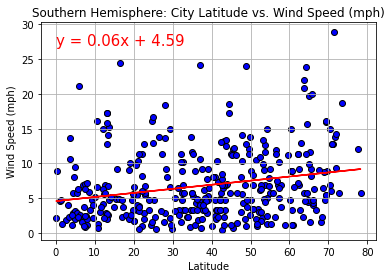

In [82]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_valuesSH4 = southern_hem_city_data['Lat']
y_valuesSH4 = southern_hem_city_data['Wind Speed']
(slopeSH4, interceptSH4, rvalueSH4, pvalueSH4, stderrSH4) = linregress(x_valuesSH4, y_valuesSH4)
regress_valuesSH4 = x_valuesSH4 * slopeSH4 + interceptSH4

print(f'The r-value is: {rvalueSH4}')

line_eqSH4 = "y = " + str(round(slopeSH4,2)) + "x + " + str(round(interceptSH4,2))

plt.scatter(x_valuesSH4, y_valuesSH4, facecolor='blue', edgecolor="black");
plt.plot(x_valuesSH4, regress_valuesSH4, "red");
plt.annotate(line_eqSH4 ,(0,27),fontsize=15,color="red");
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (mph)');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.grid()
plt.show()

In [83]:
print('The max temp increases the closer you get to latitude = 0 or the equator.\n')
print('The further north or south you go, the higher the wind speed. Meaning the lower wind speeds are closer to the equator.\n')
print('Cloudiness and humidity appear to be unaffected by the latitude, with humidity always being relatively high and cloudiness being uniformly spead out.\n')

The max temp increases the closer you get to latitude = 0 or the equator.

The further north or south you go, the higher the wind speed. Meaning the lower wind speeds are closer to the equator.

Cloudiness and humidity appear to be unaffected by the latitude, with humidity always being relatively high and cloudiness being uniformly spead out.

